In [1]:
import numpy as np
import pandas as pd

In [2]:
cd C:\\Users\\Sanju032\\Desktop\\Python_Examples\\Antwak\\Class_1\\Assignment_Project\\Customer Data

C:\Users\Sanju032\Desktop\Python_Examples\Antwak\Class_1\Assignment_Project\Customer Data


In [3]:
# Read all CSV files in different dataframes
df1=pd.read_csv('Customer Attrition Status.csv')
df2=pd.read_csv('Customer Demographics.csv')
df3=pd.read_csv('Customer Investment Snapshot.csv')
df4=pd.read_csv('Customer Portfolio Snapshot.csv')

### display the number of null and shape of the data frames

In [4]:
print('Customer Attrition Status Data:',df1.head(),'\n\nThe number of rows and columns:', df1.shape,'\n Number of null values presented in df1:\n',df1.isnull().sum())
print('\n customer Demographics data:\n',df2.head(),'\n\n The number of rows and columns:', df2.shape,'\n Number of null values presented in df2:\n',df2.isnull().sum())
print('\nCustomer Investment Snapshot Data:\n',df3.head(),'\n\nThe number of rows and columns:', df3.shape,'\n Number of null values presented in df3:\n',df3.isnull().sum())
print('\nCustomer Portfolio Snapshot Data:\n',df4.head(), '\n\nThe number of rows and columns:',df4.shape,'\n Number of null values presented in df4:\n',df4.isnull().sum())

Customer Attrition Status Data:    RowNumber  CustomerId  Exited
0          1  15634602.0     1.0
1          2  15647311.0     0.0
2          3  15619304.0     1.0
3          4  15701354.0     0.0
4          5  15737888.0     0.0 

The number of rows and columns: (10019, 3) 
 Number of null values presented in df1:
 RowNumber      0
CustomerId    19
Exited        19
dtype: int64

 customer Demographics data:
    RowNumber  CustomerId   Surname Geography  Gender   Age
0          1  15634602.0  Hargrave      West  Female  42.0
1          2  15647311.0      Hill   Central  Female  41.0
2          3  15619304.0      Onio      West  Female  42.0
3          4  15701354.0      Boni      West  Female  39.0
4          5  15737888.0  Mitchell   Central  Female  43.0 

 The number of rows and columns: (10019, 6) 
 Number of null values presented in df2:
 RowNumber      0
CustomerId    19
Surname       19
Geography     19
Gender        19
Age           19
dtype: int64

Customer Investment Snapshot

### Perform EDA on the datasets and join them

In [5]:
df_Merge1=pd.merge(df1,df2, on=('RowNumber','CustomerId'), how='outer')
print('shape of the merge data frame 1:',df_Merge1.shape, '\n\n first five rows of merge df1:\n',df_Merge1.head(),'\n Number of null values presented in first merged data frame df:\n',df_Merge1.isnull().sum())

shape of the merge data frame 1: (10019, 7) 

 first five rows of merge df1:
    RowNumber  CustomerId  Exited   Surname Geography  Gender   Age
0          1  15634602.0     1.0  Hargrave      West  Female  42.0
1          2  15647311.0     0.0      Hill   Central  Female  41.0
2          3  15619304.0     1.0      Onio      West  Female  42.0
3          4  15701354.0     0.0      Boni      West  Female  39.0
4          5  15737888.0     0.0  Mitchell   Central  Female  43.0 
 Number of null values presented in first merged data frame df:
 RowNumber      0
CustomerId    19
Exited        19
Surname       19
Geography     19
Gender        19
Age           19
dtype: int64


In [6]:
df_Merge2=pd.merge(df3,df4,on=('RowNumber','CustomerId'), how='outer')
print('\nshape of the merge data frame 2:',df_Merge2.shape, '\n\n first five rows of merge df2:\n',df_Merge2.head(),'\n Number of null values presented in second merged data frame df:\n',df_Merge2.isnull().sum())


shape of the merge data frame 2: (10040, 9) 

 first five rows of merge df2:
    RowNumber  CustomerId  Tenure  CreditScore    Balance  EstimatedSalary  \
0          1  15634602.0     2.0        619.0        NaN        101348.88   
1          2  15647311.0     1.0        608.0   83807.86        112542.58   
2          3  15619304.0     8.0        502.0  159660.80        113931.57   
3          4  15701354.0     1.0        699.0        NaN         93826.63   
4          5  15737888.0     2.0        850.0  125510.82         79084.10   

   NumOfProducts  HasChckng  IsActiveMember  
0            1.0        1.0             1.0  
1            1.0        0.0             1.0  
2            3.0        1.0             0.0  
3            2.0        0.0             0.0  
4            1.0        1.0             1.0   
 Number of null values presented in second merged data frame df:
 RowNumber             0
CustomerId           19
Tenure               38
CreditScore          41
Balance            

In [7]:
df=pd.merge(df_Merge1,df_Merge2,on=('RowNumber','CustomerId'), how='outer')
print('\nhape of the final merged data frame:',df.shape, '\n\n first five rows of final merged df:\n',df.head(),'\n Number of null values presented in final merged data frame df:\n',df.isnull().sum())


hape of the final merged data frame: (10040, 14) 

 first five rows of final merged df:
    RowNumber  CustomerId  Exited   Surname Geography  Gender   Age  Tenure  \
0          1  15634602.0     1.0  Hargrave      West  Female  42.0     2.0   
1          2  15647311.0     0.0      Hill   Central  Female  41.0     1.0   
2          3  15619304.0     1.0      Onio      West  Female  42.0     8.0   
3          4  15701354.0     0.0      Boni      West  Female  39.0     1.0   
4          5  15737888.0     0.0  Mitchell   Central  Female  43.0     2.0   

   CreditScore    Balance  EstimatedSalary  NumOfProducts  HasChckng  \
0        619.0        NaN        101348.88            1.0        1.0   
1        608.0   83807.86        112542.58            1.0        0.0   
2        502.0  159660.80        113931.57            3.0        1.0   
3        699.0        NaN         93826.63            2.0        0.0   
4        850.0  125510.82         79084.10            1.0        1.0   

   IsAct

In [8]:
# Rearrange the columns
df=df[['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasChckng','IsActiveMember','EstimatedSalary','Exited']]

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,West,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,West,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [10]:
# df.set_index('RowNumber', inplace = True)
# df.head()

In [11]:
# Find the number of unique sample presented in each column
df.nunique(dropna = True)

RowNumber          10019
CustomerId         10019
Surname             2932
CreditScore          462
Geography              3
Gender                 3
Age                   72
Tenure                12
Balance             6381
NumOfProducts          4
HasChckng              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
# sort the values based on CustomerId
# df.sort_values("CustomerId", inplace = True)
# df.head()

In [13]:
df.drop_duplicates(subset ="CustomerId", inplace = True)
df.shape

(10020, 14)

In [14]:
df.dropna(how='all',inplace=True)

In [15]:
df.isnull().sum()

RowNumber             0
CustomerId            1
Surname              20
CreditScore          23
Geography            20
Gender               20
Age                  20
Tenure               20
Balance            3637
NumOfProducts        20
HasChckng            20
IsActiveMember       20
EstimatedSalary      20
Exited               20
dtype: int64

In [16]:
df.drop('RowNumber',axis=1,inplace=True)

In [17]:
df.drop_duplicates(subset ="CustomerId", inplace = True)

In [18]:
df.dropna(how='all',inplace=True)
df.isnull().sum()

CustomerId            0
Surname              19
CreditScore          22
Geography            19
Gender               19
Age                  19
Tenure               19
Balance            3636
NumOfProducts        19
HasChckng            19
IsActiveMember       19
EstimatedSalary      19
Exited               19
dtype: int64

In [19]:
# conda install seaborn=0.9.0

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - seaborn=0.9.0


The following NEW packages will be INSTALLED:

  tbb                pkgs/main/win-64::tbb-2018.0.5-he980bc4_0

The following packages will be UPDATED:

  conda                                4.9.2-py37haa95532_0 --> 4.10.3-py37haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [20]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

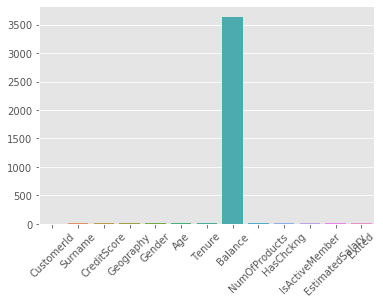

In [21]:
null_set = df.isnull().sum()
sns.barplot(x=null_set.index,y=null_set)
plt.xticks(rotation=45)

In [22]:
df.set_index('CustomerId', inplace = True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602.0,Hargrave,619.0,West,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
15647311.0,Hill,608.0,Central,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
15619304.0,Onio,502.0,West,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
15701354.0,Boni,699.0,West,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
15737888.0,Mitchell,850.0,Central,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [23]:
df.dropna(how='all',inplace=True)
# df

In [24]:
df.sort_index(inplace=True)

In [25]:
df.reset_index(inplace=True)

In [26]:
df.isnull().sum()

CustomerId            0
Surname               0
CreditScore           3
Geography             0
Gender                0
Age                   0
Tenure                0
Balance            3617
NumOfProducts         0
HasChckng             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

In [27]:
# Using the concept of forward fill method from Pandas to fill missing values in Type

df_M1 = df
df_M1.shape

(10000, 13)

In [28]:
#Mcols=['CreditScore','Balance']
#for x in Mcols:
 #   df_M1.loc[df_M1[x].isnull(),x] = df_M1[x].median()
    
#df_M1[['CreditScore']] = df_M1[['CreditScore']].fillna(method="ffill")
#print('Null for df_M1:\n',df_M1.isnull().sum(), '\n Null for df:\n',df.isnull().sum())
#df_M1.head()

In [29]:
# Apply mean for missing values
# missing_column = ['Balance']
#for i in missing_column:
#    df_M1.loc[df_M1.loc[:,i].isnull(),i]=df_M1.loc[:,i].mean()

In [30]:
#df_M1.isnull().sum()

In [31]:
# apply interpolation to fill the missing values
Mcols=['CreditScore','Balance']
for x in Mcols:
    df.loc[df[x].isnull(),x] = df[x].interpolate(method ='linear', limit_direction ='forward',inplace=True)
    
# df['Balance'].interpolate(method ='linear', limit_direction ='forward',inplace=True)

In [32]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
df.dtypes

CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasChckng          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [34]:
# Perform Basic statitistical analysis for the dataset
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.494350,38.943500,5.015400,119850.829299,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.699981,10.613726,2.902931,27463.539126,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,305.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,102471.818750,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,119762.385000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.250000,137264.721667,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,865.000000,190.000000,30.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
# estimate the pairise corelation of all the columns in a dataframe
corr=df.corr()
corr

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005800,0.008627,-0.015261,-0.008977,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005800,1.000000,-0.004077,-0.002044,-0.002359,0.011988,-0.005908,0.025844,-0.002223,-0.027778
Age,0.008627,-0.004077,1.000000,-0.009025,-0.005696,-0.028665,-0.013279,0.082351,-0.009181,0.280904
Tenure,-0.015261,-0.002044,-0.009025,1.000000,-0.000998,0.017197,0.023078,-0.029180,0.008055,-0.012178
Balance,-0.008977,-0.002359,-0.005696,-0.000998,1.000000,-0.000343,0.005006,-0.007108,-0.004927,0.017101
NumOfProducts,0.016972,0.011988,-0.028665,0.017197,-0.000343,1.000000,0.003183,0.009612,0.014204,-0.047820
HasChckng,-0.014025,-0.005908,-0.013279,0.023078,0.005006,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025844,0.082351,-0.029180,-0.007108,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.002223,-0.009181,0.008055,-0.004927,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027778,0.280904,-0.012178,0.017101,-0.047820,-0.007138,-0.156128,0.012097,1.000000


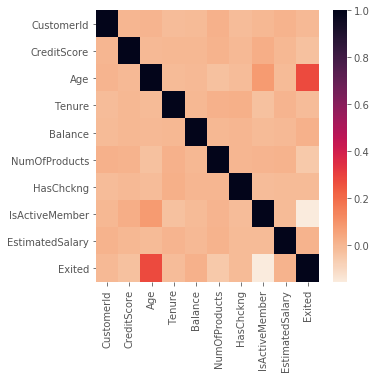

In [36]:
# plot the graph for the visualization of correlation
plt.figure(figsize = (5, 5))
sns.heatmap(corr, cmap="rocket_r")
plt.show()

From the above correlation we observed that age has a weak positive correlation with the target variable. IsActiveMember has a weak negative correlation

In [37]:
df.skew()

CustomerId         0.001149
CreditScore       -0.074818
Age                1.278170
Tenure             0.071980
Balance            0.035456
NumOfProducts      0.745568
HasChckng         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# Lets try some Visualization techniques for the dataset

In [38]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

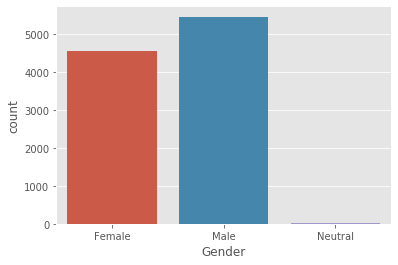

In [39]:
sns.countplot(x='Gender',data=df)

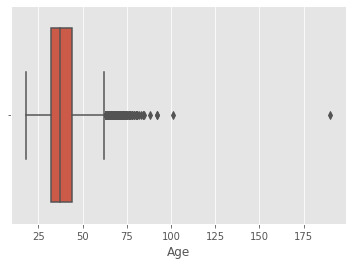

In [40]:
sns.boxplot(data=df,x='Age')

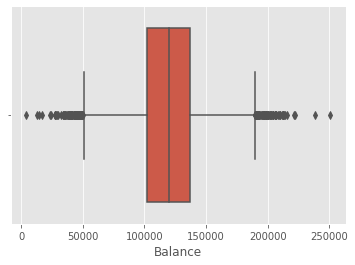

In [41]:
sns.boxplot(data=df,x='Balance')

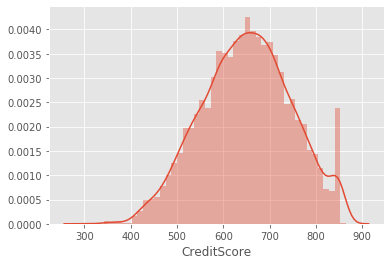

In [44]:
sns.distplot(df.CreditScore,kde=True)

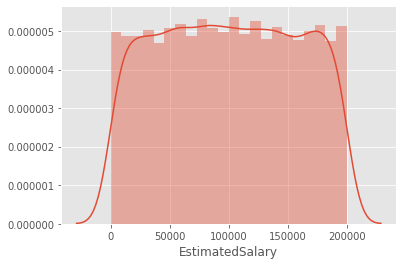

In [46]:
sns.distplot(df.EstimatedSalary,kde=True)

In [50]:
df.groupby('Geography')['Geography'].count()

Geography
Central    2477
East       2509
West       5014
Name: Geography, dtype: int64

In [51]:
df5 = pd.crosstab(index=df['Geography'],columns=df['Exited'])
df5.reset_index(inplace=True)

In [52]:
df6 = pd.melt(df5,id_vars=['Geography'])
df6

,Geography,Exited,value
0,Central,0,2064
1,East,0,1695
2,West,0,4204
3,Central,1,413
4,East,1,814
5,West,1,810


From the above analysis found that the highest number of people exited from East geography and Central has less churn.

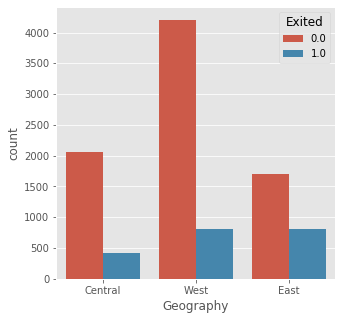

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(x='Geography',data=df,hue='Exited')

In [57]:
# sns.catplot(data=df6,x='Geography',y='value',hue='Exited',kind='bar')

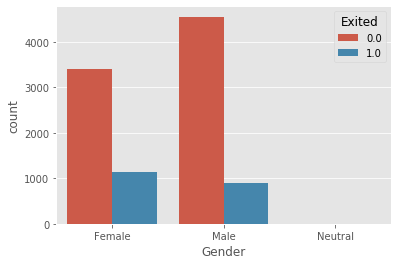

In [59]:
sns.countplot(x='Gender',data=df,hue='Exited')